In [2]:
# %pip install scikit-learn pandas matplotlib

## Get Dataset

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
type(y)

pandas.core.series.Series

In [7]:
X = X.to_numpy()
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y[0]

'5'

In [9]:
X[0].shape

(784,)

In [10]:
def sample_digit(target, X=X, y=y):
    return next((digit for (digit, label) in zip(X, y) if label == str(target))).reshape((28,28))

def display_mnist_digits():
    fig, axs = plt.subplots(2, 5)

    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(sample_digit(5*i + j), cmap="gray")
            axs[i, j].axes.xaxis.set_visible(False)
            axs[i, j].axes.yaxis.set_visible(False)

    # return fig

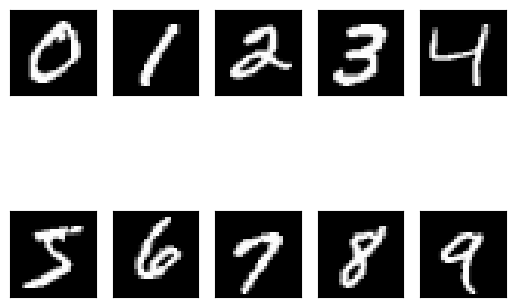

In [11]:
display_mnist_digits()

## Retina

A retina mapeia as entradas de uma imagem para posições aleatórias de RAM

In [12]:
import numpy as np

In [13]:
img = X[0]
label = y[0]
shape = (28,28)

In [14]:
def display_char(*, img: np.ndarray, label:str):
    img = img.reshape(shape)
    fig, ax = plt.subplots(1,1)
    ax.set_title(label)
    ax.imshow(img, cmap="gray")


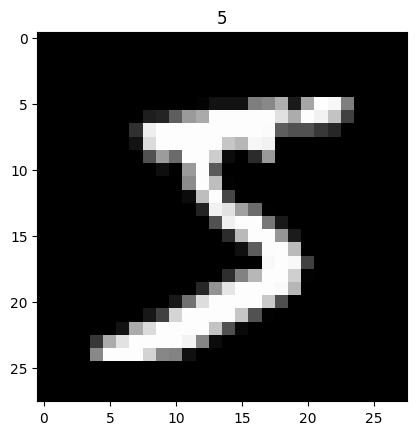

In [15]:
display_char(img=img, label=label)

In [16]:
node_size = 16

def make_retina(*, img: np.ndarray, node_size: int):
    img_size = len(img)
    n_nodes =  img_size // node_size

    positions = [x for x in range(img_size)]
    np.random.shuffle(positions)
    retina = []
    for node_id in range(n_nodes):
        node = []
        for i in range(node_size):
            p = positions.pop()
            node.append(p)
        retina.append(node)
    return np.array(retina)

In [17]:
retina = make_retina(
    img = img,
    node_size = 16,
)

In [27]:
retina.shape

(49, 16)

## Train

In [208]:
memory = dict()

def get_pattern_from_img(*, img: np.ndarray, mapper):
  pattern = np.zeros(shape=(16,1), dtype=bool)
  for n, address in enumerate(mapper):
    value = img[address]
    pixel_lighted = value > 0
    pattern[n] = pixel_lighted
  # encode pattern as bits
  b_pattern = pattern.tobytes()
  return b_pattern

def train(*, img: np.ndarray):
  for node_id, node in enumerate(retina):
    mapper = retina[node_id]
    if node_id not in memory:
      memory[node_id] = dict()

    b_pattern = get_pattern_from_img(
      img = img,
      mapper = mapper,
    )
    if b_pattern not in memory[node_id]:
      memory[node_id][b_pattern] = 1
    else:
      memory[node_id][b_pattern] +=1



for label, img in zip(y, X):
  if label == '5':
    train(img = img)

In [209]:
def get_mental_memory():
  mental_memory = np.zeros(shape=img.shape)

  for node_id in memory:
    mapper = retina[node_id]

    for pattern in memory[node_id]:
      count = memory[node_id][pattern]
      for bit, address in zip(pattern, mapper):
        if bit == 1:
          mental_memory[address] +=count
  return mental_memory

In [210]:
img.shape

(784,)

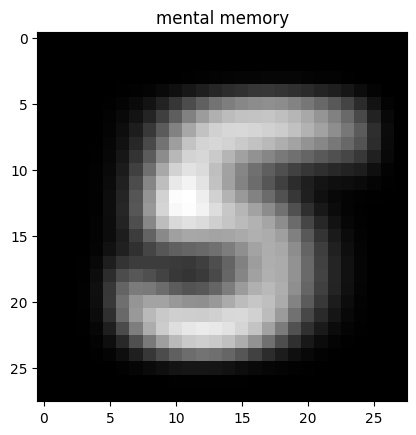

In [211]:
mental_memory = get_mental_memory()
display_char(img = mental_memory, label='mental memory')


## Classify

In [203]:
def classify(*, img, memory, retina):
  hits = 0
  n_nodes = len(memory)

  for node_id in memory:
    mapper = retina[node_id]
    b_pattern = get_pattern_from_img(
        img = img,
        mapper = mapper,
    )

    # a pattern learned before
    if b_pattern in memory[node_id]:
      counter = memory[node_id][b_pattern]
      if counter > 0:
        hits +=1

  confidence = hits/n_nodes
  return confidence

img = X[1]
classify(
    img = img,
    memory = memory,
    retina = retina,
)

0.42857142857142855

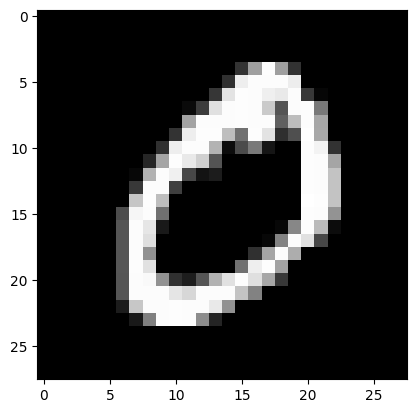

In [204]:
display_char(img = img, label='')